## Predicting Returns

The goal of this section is to make a model predicting how much principal a particular lender return after the completion of the loan term. 

In [1]:
"""Import libraries"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
"""Read data in pandas"""

df = pd.read_csv('Intermediate_data\Trimmed.csv',
                 parse_dates=['earliest_cr_line',
                              'issue_d', 'last_pymnt_d',
                              'next_pymnt_d',
                              'last_credit_pull_d'])

df['history'] = (df.issue_d - df.earliest_cr_line).dt.days

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
"""For the purpose of this model, I consider only the
loans that have completed the terms. """

df['termd'] = pd.to_timedelta(df.term, unit='M')

df_complete = df[df.issue_d + df.termd < df.issue_d.max()]

# Delete data that are leaks the information.

df_complete.drop(['last_pymnt_amnt', 'collection_recovery_fee',
                  'recoveries', 'out_prncp_inv', 'out_prncp',
                  'int_rate', 'total_pymnt', 'total_pymnt_inv',
                  'total_rec_late_fee', 'total_rec_int',
                  'emp_title', 'debt_settlement_flag',
                  'addr_state', 'purpose', 'delinq_amnt',
                  'hardship_flag', 'pymnt_plan',
                  'earliest_cr_line', 'issue_d',
                  'last_pymnt_d', 'next_pymnt_d', 'termd',
                  'last_credit_pull_d'],
                 axis=1, inplace=True)

C:\Users\lekhn_000\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
"""Converting categorical variables to numerical dummies."""

cate_list = list(df_complete.dtypes[df_complete.dtypes == 'object'].index)

df_cate = df[cate_list]

df_cat_dum = pd.get_dummies(df_cate, drop_first=True)

In [5]:
"""Replacing the missing values with their mean."""

df_num_col = df_complete.dtypes[df_complete.dtypes == 'float64']

df_num = df[list(df_num_col.index)]

for col in df_num.columns:
    df_num[col].fillna(df_num[col].mean(), inplace=True)

df_combined = pd.concat([df_num, df_cat_dum], axis=1)

y = df_combined['total_rec_prncp']
X = df_combined.drop(['total_rec_prncp'], axis=1).values

C:\Users\lekhn_000\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
"""Data normalization and train-test split"""
scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled,
                                                    y, test_size=0.5,
                                                    random_state=77)

In [7]:
"""Linear regression """

reg = LinearRegression(n_jobs=-1, normalize=False).fit(X_train, y_train)

reg_score = reg.score(X_test, y_test)

print(reg_score)

0.5032486752659178


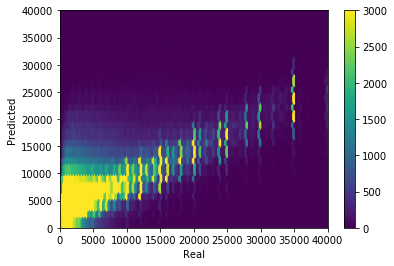

In [8]:
"""The predicted values compares well with the original data."""

pred = reg.predict(X_test)

plt.hexbin(y_test, pred, gridsize=100, vmax=3000)

plt.xlim(0, 40000)
plt.ylim(0, 40000)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.colorbar()
plt.show()